In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) 

In [15]:
def find_contours(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
#     edges = cv2.Canny(img, 10, 40, 1, L2gradient=True)   #DRAGONGRUIT4
    edges = cv2.Canny(img, 30, 150, 3, L2gradient=False)
#     plt.imshow(edges)
#     plt.show()
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)
#     plt.imshow(edges)


    contour_info = []
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]
    
    
    
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))
#     plt.imshow(mask)
    #-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    
    #-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
    
    plt.figure(figsize=(14,14))
    plt.subplot(121), plt.title(path), plt.imshow(img)
    plt.subplot(122), plt.imshow(masked)
    plt.show()

In [16]:
path = "../find/bali26samples/" 
files = os.listdir(path)

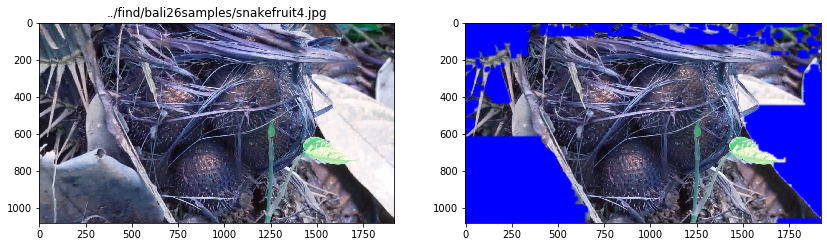

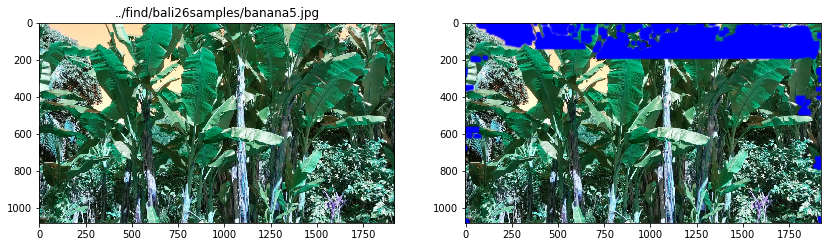

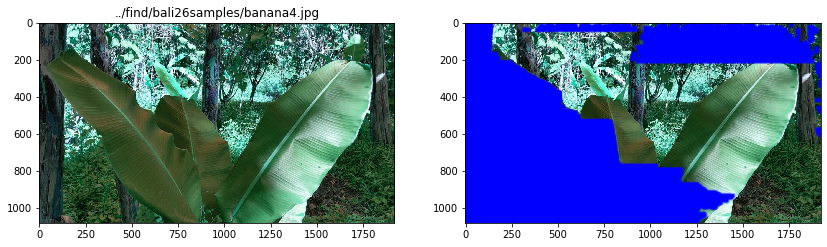

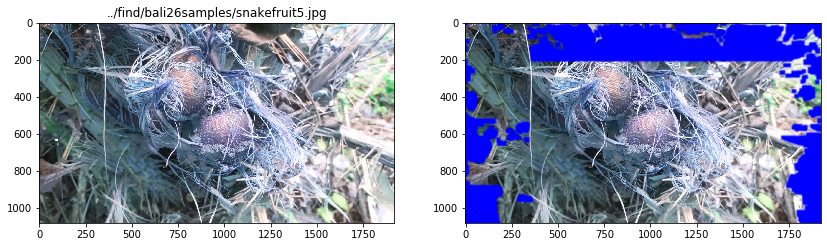

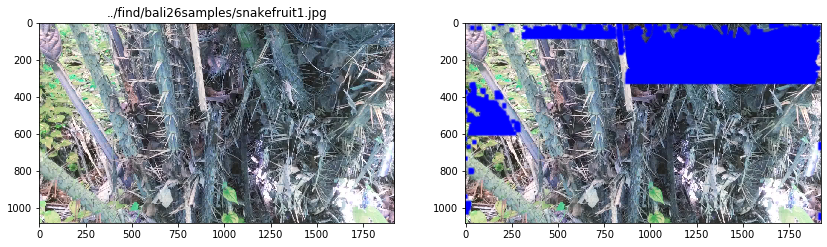

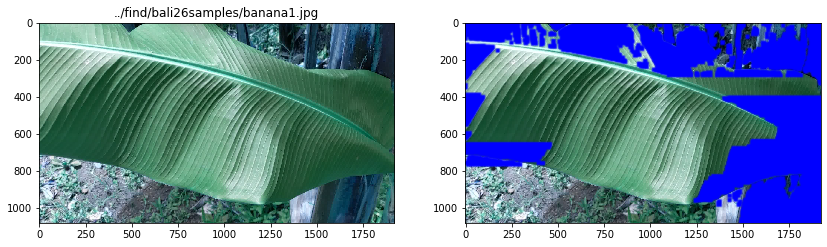

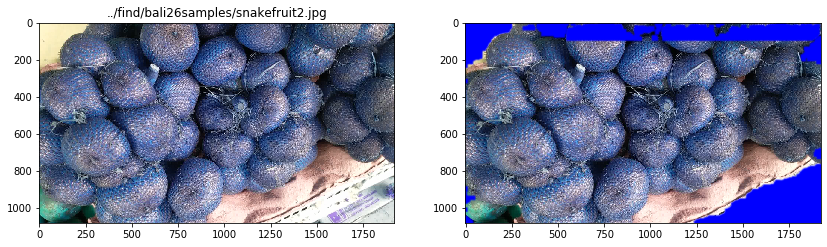

KeyboardInterrupt: 

In [17]:
for count, file in enumerate(files):
    find_contours(path + file)
    if count == 10: break